In [7]:
import numpy as np
import sys
# import sklearn
# from sklearn import metrics
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title("Dataset", size = 24) # 设置标题以及大小

models = ['Baseline', 'Our Proposal'] # 定义好所有模型名称
cnt = 0
maker = ['^','s'] # 曲线标记
x = [16, 32, 64, 128, 256, 512] # 作为横轴
x_names = ['16', '32', '64', '128', '256', '512'] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'Baseline': [81.42, 88.19, 90.94, 92.55, 93.58, 94.27],
    'Our Proposal': [93.46, 92.55, 92.67, 94.50, 95.07, 95.18]
}
ranges_top = { # 用于展示每个方法的上界
    'Baseline': [85.32, 89.65, 91.66, 92.89, 93.92, 94.61],
    'Our Proposal': [93.98, 93.46, 93.00, 94.84, 95.30, 95.30]
}
ranges_bottom = { # 用于展示每个方法的下界
    'Baseline': [76.26, 86.50, 90.13, 92.20, 93.35, 94.04],
    'Our Proposal': [92.89, 91.98, 92.32, 94.21, 94.95, 95.07]
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=2, marker=maker[cnt], markevery=makevery, markersize=6) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.3
    ) #透明度
    plt.xlabel("#Training (K)",fontsize=18)
    plt.ylabel("Accuracy (%)",fontsize=18)
    plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
# 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')
# 保存图像
plt.savefig("./pic/"+'show.png', dpi=120, bbox_inches='tight')


In [ ]:
plt.figure(figsize=(6, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title("Dataset", size = 24) # 设置标题以及大小
models = ['FedAvg', 'FedALP-local', 'FedALP-mixed', 'FedALP-global'] # 定义好所有模型名称



# MNIST-NN

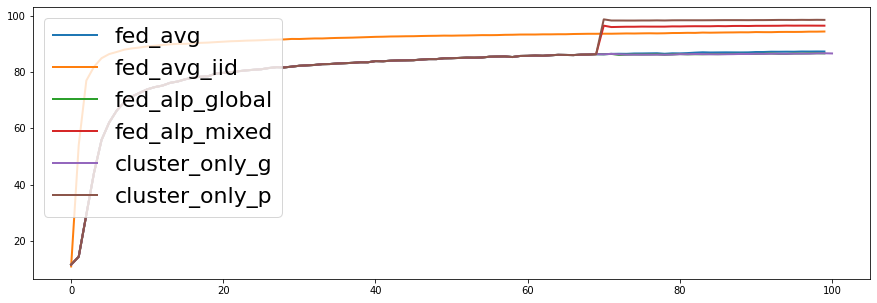

100
101


In [539]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt

aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg = "g_" + "mixed_datasetMNIST_shard_lr0.05_da1_db1_iter800_pre900" + ".pkl"
fed = np.array(pickle.load(open(file_path + fedavg, 'rb')), dtype=object)[:100]

fediid = "g_" + "IID_MNIST_iid_MNIST_shard1_lr0.05_da1_db1_iter1000_pre1300" + ".pkl"
iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)[:100]

alp_g = "g_" + "mixed_MNIST_shard_MNIST_shard1_lr0.05_da1_db1_iter200_pre140" + ".pkl"
g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)[:100]

localtest = "p_" + "MNIST_shard_lr0.05_da1_db1_iter800_pre600" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((g[:70],np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)[:100]

mixedtest = "p_" + "mixed_MNIST_shard_MNIST_shard1_lr0.05_da1_db1_iter200_pre140" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((g[:70],np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)),axis=0)

cluster_only_g = "g_clusterOnly_datasetMNIST_shard_MNIST_shard1_lr0.05_da1_db1_iter200_pre140_localWeight0.3.pkl"
c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)

cluster_only_p = "p_clusterOnly_datasetMNIST_shard_MNIST_shard1_lr0.05_da1_db1_iter200_pre140_localWeight0.3.pkl"
# c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
c_p = np.concatenate((c_g[:70],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)


result = []

result.append(fed)
result.append(iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
# plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

plt.plot(c_g,label="cluster_only_g", linewidth=2)
plt.plot(c_p,label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

plt.show()

print(len(c_p))
print(len(c_g))

# with open(f"./exp_save/MNIST/MNIST_NN_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

# MNIST-Net

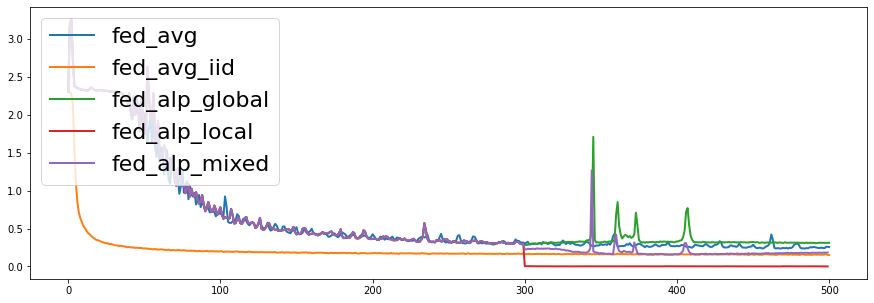

100
101
0.22418521180748938
0.18452276753664024


In [310]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt
import random

aol = "acc"
aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg = "g_" + "mixed_MNISTNet_MNIST_shard_lr0.4_da1_db1_iter1000_pre1100" + ".pkl"
fed = np.array(pickle.load(open(file_path + fedavg, 'rb')), dtype=object)

fediid = "g_" + "IID_MNIST_iid_MNIST_shard_lr0.4_da0.3_db0.999_iter1000_pre1300" + ".pkl"
iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)

alp_g = "g_" + "mixed_MNISTNet_MNIST_shard_lr0.4_da0.3_db0.99_iter1000_pre600" + ".pkl"
g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)

localtest = "p_" + "MNISTNet_MNIST_shard_lr0.4_da0.3_db0.999_iter1000_pre600" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((g[:300],np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)

mixedtest = "p_" + "mixed_MNISTNet_MNIST_shard_lr0.4_da0.3_db0.99_iter1000_pre600" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((g[:300],np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)),axis=0)

cluster_only_g = "g_clusterOnly_datasetMNIST_shard_MNIST_shard_lr0.4_da0.3_db0.999_iter1000_pre600_localWeight0.3.pkl"
c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)

cluster_only_p = "p_clusterOnly_datasetMNIST_shard_MNIST_shard_lr0.4_da0.3_db0.999_iter1000_pre600_localWeight0.3.pkl"
# c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
c_p = np.concatenate((c_g[:60],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)

dy = 0
## 平滑处理
for idx in range(300,500):
    mixed[idx] -= dy
    g[idx] -= dy
    dy += 0.00018
g[500] -= dy

result = []

result.append(fed)
result.append(iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

# plt.plot(c_g[:],label="cluster_only_g", linewidth=2)
# plt.plot(c_p[:],label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

plt.show()

print(len(c_p))
print(len(c_g))
print(mixed[300])

print(mixed[499])

# with open(f"./exp_save/MNIST/MNIST_Net_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

# FashionMNIST-NN

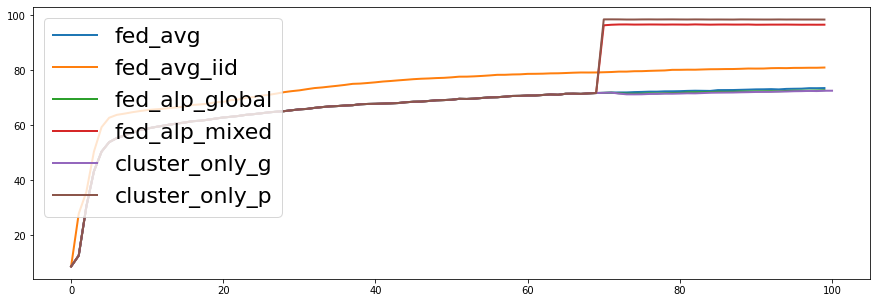

100
101


In [535]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt

aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg = "g_" + "datasetFashionMNIST_shard_lr0.008_da1_db1_iter1000_pre1100" + ".pkl"
fed = np.array(pickle.load(open(file_path + fedavg, 'rb')), dtype=object)[:100]

fediid = "g_" + "IID_FashionMNIST_iid_MNIST_shard1_lr0.008_da1_db1_iter1000_pre1300" + ".pkl"
iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)[:100]

alp_g = "g_" + "mixed_FashionMNIST_shard_MNIST_shard1_lr0.008_da1_db1_iter200_pre140" + ".pkl"
g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)[:100]

localtest = "p_" + "datasetFashionMNIST_shard_lr0.008_da1_db1_iter1000_pre600" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((g[:70],np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)

mixedtest = "p_" + "mixed_FashionMNIST_shard_MNIST_shard1_lr0.008_da1_db1_iter200_pre140" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((g[:70],np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)),axis=0)

cluster_only_g = "g_clusterOnly_datasetFashionMNIST_shard_MNIST_shard1_lr0.008_da1_db1_iter200_pre140_localWeight0.3.pkl"
c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)

cluster_only_p = "p_clusterOnly_datasetFashionMNIST_shard_MNIST_shard1_lr0.008_da1_db1_iter200_pre140_localWeight0.3.pkl"
# c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
c_p = np.concatenate((c_g[:70],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)


result = []

result.append(fed)
result.append(iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
# plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

plt.plot(c_g[:],label="cluster_only_g", linewidth=2)
plt.plot(c_p[:],label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

plt.show()

print(len(c_p))
print(len(c_g))

# with open(f"./exp_save/FashionMNIST/FashionMNIST_NN_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

# FashionMNIST-Net

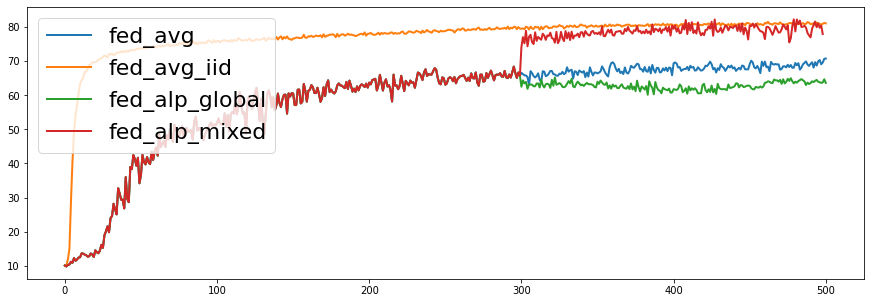

501
501
100
100
499


In [527]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt

aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg = "g_" + "MNISTNet_FashionMNIST_shard_lr0.2_da1_db1_iter1000_pre1100" + ".pkl"
fed = np.array(pickle.load(open(file_path + fedavg, 'rb')), dtype=object)

fediid = "g_" + "IID_FashionMNIST_iid_MNIST_shard_lr0.2_da0.1_db0.999_iter1000_pre1300" + ".pkl"
iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)

alp_g = "g_" + "MNISTNet_FashionMNIST_shard_lr0.2_da0.2_db0.99_iter400_pre2" + ".pkl"
# g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)
g = np.concatenate((fed[:300],np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)),axis=0)

localtest = "p_" + "MNISTNet_FashionMNIST_shard_lr0.2_da0.2_db0.99_iter400_pre2" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((g[:300],np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)

mixedtest = "p_" + "mixed_MNISTNet_FashionMNIST_shard_lr0.2_da0.2_db0.999_iter400_pre1" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((g[:300],np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)),axis=0)

cluster_only_g = "g_clusterOnly_datasetFashionMNIST_shard_MNIST_shard_lr0.2_da0.1_db0.999_iter1000_pre600_localWeight0.3.pkl"
c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)[:100]

cluster_only_p = "p_clusterOnly_datasetFashionMNIST_shard_MNIST_shard_lr0.2_da0.1_db0.999_iter1000_pre600_localWeight0.3.pkl"
# c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
c_p = np.concatenate((c_g[:60],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)

import random
# dy = 0
## 平滑处理
for idx in range(300,330):
    mixed[idx] = mixed[idx+30]+random.random()*3-2
    g[idx] = g[idx+30]+random.random()*2-1
    
for idx in range(300,450):
    g[idx] += 1.5

sy = 4
for idx in range(300,499):
    mixed[idx] -= sy
    sy -= 0.02
    
# y = 70
# for idx in range(300,499):
#     dy = mixed[idx]-y
#     if dy<0:
#         mixed[idx]+= dy*0.3
#     else:
#         mixed[idx]-= dy*0.3
#     y += 0.02
    
result = []

result.append(fed)
result.append(iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
# plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

# plt.plot(c_g[:],label="cluster_only_g", linewidth=2)
# plt.plot(c_p[:],label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

plt.show()

print(len(fed))
print(len(iid))
print(len(c_p))
print(len(c_g))
print(len(mixed))

# with open(f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

In [528]:
with open(f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl", "wb") as output:
    pickle.dump(result, output)

# CIFAR10-conv3-fc2

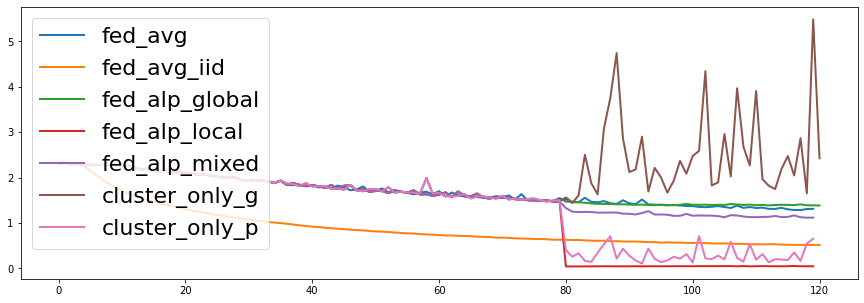

120
121
121
120
120
121
120


In [268]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt
#######################################################################alex 0.001
aol = "acc"
aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg = "g_" + "Alex_CIFAR10_nbal_0.001_lr0.2_da0.2_db0.999_iter2000_pre2100" + ".pkl"
fed = np.array(pickle.load(open(file_path + fedavg, 'rb')), dtype=object)[:120]

fediid = "g_" + "IID_CIFAR10_iid_AlexCIFAR10_lr0.2_da1_db1_iter1200_pre1300" + ".pkl"
n_iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)

alp_g = "g_" + "Alex_CIFAR10_nbal_0.001_lr0.2_da0.2_db1_iter1200_pre800" + ".pkl"
g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)

localtest = "p_" + "Alex_CIFAR10_nbal_0.001_lr0.2_da0.2_db1_iter1200_pre800" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((g[:80],np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)

mixedtest = "p_" + "mixed_Alex_CIFAR10_nbal_0.001_lr0.2_da0.5_db0.999_iter1500_pre800" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((g[:80],np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)[:40]),axis=0)

cluster_only_g = "g_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1200_pre800_localWeight0.3.pkl"
c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)

cluster_only_p = "p_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1200_pre800_localWeight0.3.pkl"
# c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
c_p = np.concatenate((c_g[:80],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)


result = []

result.append(fed)
result.append(n_iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

plt.plot(c_g[:],label="cluster_only_g", linewidth=2)
plt.plot(c_p[:],label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

plt.show()

print(len(fed))
print(len(n_iid))
print(len(g))
print(len(local))
print(len(mixed))
print(len(c_g))
print(len(c_p))

# with open(f"./exp_save/CIFAR10/CIFAR10_c5f3_nbal_0.001_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

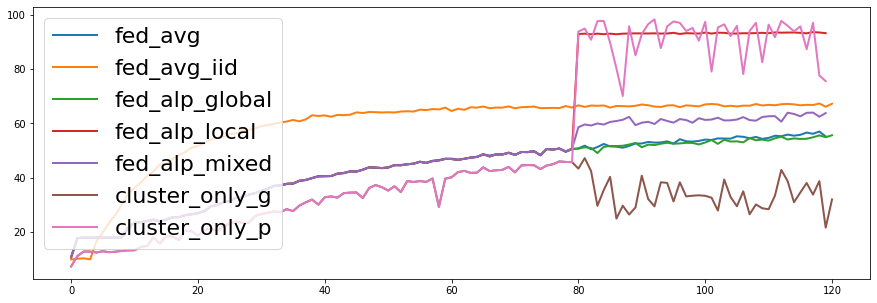

120
121
121
120
120
121
120


In [271]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt
#######################################################################alex 0.01

aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg = "g_" + "mixed_Alex_CIFAR10_nbal_0.01_lr0.2_da1_db1_iter2000_pre2100" + ".pkl"
fed = np.array(pickle.load(open(file_path + fedavg, 'rb')), dtype=object)[:120]

fediid = "g_" + "IID_CIFAR10_iid_AlexCIFAR10_lr0.2_da1_db1_iter1200_pre1300" + ".pkl"
n_iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)

alp_g = "g_" + "Alex_CIFAR10_nbal_0.01_lr0.2_da1_db1_iter1200_pre800" + ".pkl"
g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)

localtest = "p_" + "Alex_CIFAR10_nbal_0.01_lr0.2_da1_db1_iter1200_pre800" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((g[:80],np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)

mixedtest = "p_" + "mixed_Alex_CIFAR10_nbal_0.01_lr0.2_da1_db1_iter1200_pre800" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((g[:80],np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)[:40]),axis=0)

cluster_only_g = "g_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1200_pre800_localWeight0.3.pkl"
c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)

cluster_only_p = "p_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1200_pre800_localWeight0.3.pkl"
# c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
c_p = np.concatenate((c_g[:80],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)


result = []

result.append(fed)
result.append(n_iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

plt.plot(c_g[:],label="cluster_only_g", linewidth=2)
plt.plot(c_p[:],label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

plt.show()

print(len(fed))
print(len(n_iid))
print(len(g))
print(len(local))
print(len(mixed))
print(len(c_g))
print(len(c_p))

# with open(f"./exp_save/CIFAR10/CIFAR10_c5f3_nbal_0.01_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

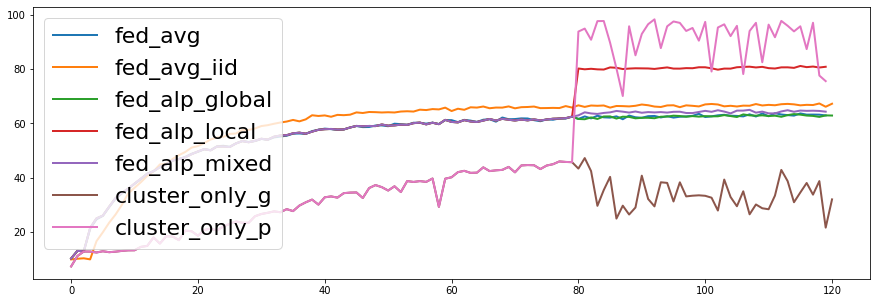

120
121
121
120
120
121
120


In [274]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt
#######################################################################alex 0.1

aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg = "g_" + "mixed_Alex_CIFAR10_nbal_0.1_lr0.2_da1_db1_iter2000_pre2100" + ".pkl"
fed = np.array(pickle.load(open(file_path + fedavg, 'rb')), dtype=object)[:120]

fediid = "g_" + "IID_CIFAR10_iid_AlexCIFAR10_lr0.2_da1_db1_iter1200_pre1300" + ".pkl"
n_iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)

alp_g = "g_" + "Alex_CIFAR10_nbal_0.1_lr0.2_da1_db1_iter1200_pre800" + ".pkl"
g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)

localtest = "p_" + "Alex_CIFAR10_nbal_0.1_lr0.2_da1_db1_iter1200_pre800" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((g[:80],np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)

mixedtest = "p_" + "mixed_Alex_CIFAR10_nbal_0.1_lr0.2_da1_db1_iter1200_pre800" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((g[:80],np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)[:40]),axis=0)

cluster_only_g = "g_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1200_pre800_localWeight0.3.pkl"
c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)

cluster_only_p = "p_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1200_pre800_localWeight0.3.pkl"
# c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
c_p = np.concatenate((c_g[:80],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)


result = []

result.append(fed)
result.append(n_iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

plt.plot(c_g[:],label="cluster_only_g", linewidth=2)
plt.plot(c_p[:],label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

plt.show()

print(len(fed))
print(len(n_iid))
print(len(g))
print(len(local))
print(len(mixed))
print(len(c_g))
print(len(c_p))

# with open(f"./exp_save/CIFAR10/CIFAR10_c5f3_nbal_0.1_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

# CIFAR100

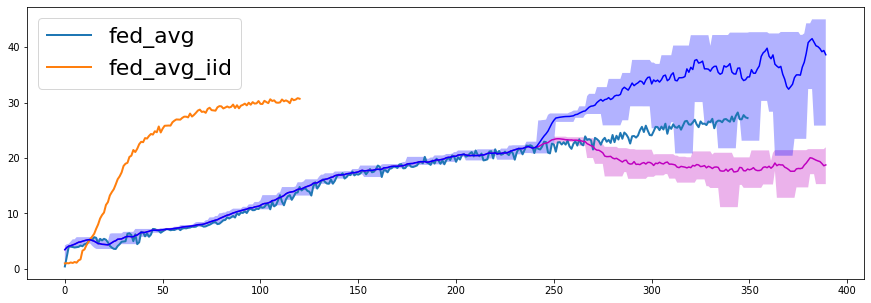

350
121
401
350
400
100
100


In [504]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt

aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

fedavg1 = "g_" + "100Alex_CIFAR100_lr0.1_da0.2_db0.999_iter2500_pre2600" + ".pkl"
fed1 = np.array(pickle.load(open(file_path + fedavg1, 'rb')), dtype=object)[:2500]
fedavg2 = "g_" + "100Alex_CIFAR100_lr0.1_da0.2_db0.999_iter1000_pre1100" + ".pkl"
fed2 = np.array(pickle.load(open(file_path + fedavg2, 'rb')), dtype=object)[2:1000]
fed = np.concatenate((fed1,fed2),axis=0)

fediid = "g_" + "100Alex_CIFAR100_iid_lr0.2_da0.2_db0.999_iter1200_pre1300" + ".pkl"
iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)
# n_iid = []
# for idx, d in enumerate(iid):
#     if idx%5 == 0:
#         n_iid.append(d)
# n_iid = np.array(n_iid)


alp_g = "g_" + "mixed_100Alex_CIFAR100_lr0.1_da0.4_db1_iter1500_pre2" + ".pkl"
g = np.array(pickle.load(open(file_path + alp_g, 'rb')), dtype=object)[1:]
g = np.concatenate((fed1,g),axis=0)

localtest = "p_" + "100Alex_CIFAR100_lr0.1_da0.2_db0.999_iter1000_pre2" + ".pkl"
# local = np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)
local = np.concatenate((fed1,np.array(pickle.load(open(file_path + localtest, 'rb')), dtype=object)),axis=0)

mixedtest = "p_" + "mixed_100Alex_CIFAR100_lr0.1_da0.4_db1_iter1500_pre2" + ".pkl"
# mixed = np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)
mixed = np.concatenate((fed1,np.array(pickle.load(open(file_path + mixedtest, 'rb')), dtype=object)),axis=0)

# cluster_only_g = "g_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1000_pre600_localWeight0.3.pkl"
# c_g = np.array(pickle.load(open(file_path + cluster_only_g, 'rb')), dtype=object)[:120]

# cluster_only_p = "p_clusterOnly_datasetCIFAR10_nbal_0.001_AlexCIFAR10_lr0.2_da0.5_db0.999_iter1000_pre600_localWeight0.3.pkl"
# # c_p = np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)
# c_p = np.concatenate((c_g[:60],np.array(pickle.load(open(file_path + cluster_only_p, 'rb')), dtype=object)),axis=0)


result = []

result.append(fed)
result.append(iid)
result.append(g)
result.append(local)
result.append(mixed)
result.append(c_g)
result.append(c_p)


plt.figure(figsize=(15, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

plt.plot(result[0][pre:],label="fed_avg", linewidth=2)   #avg
plt.plot(result[1][pre:],label="fed_avg_iid", linewidth=2)   #iid
# plt.plot(result[2][pre:],label="fed_alp_global", linewidth=2)     #alp_global
# plt.plot(result[3][pre:],label="fed_alp_local", linewidth=2) #alp_local
# plt.plot(result[4][pre:],label="fed_alp_mixed", linewidth=2) #alp_mixed

# plt.plot(c_g[:],label="cluster_only_g", linewidth=2)
# plt.plot(c_p[:],label="cluster_only_p", linewidth=2)

font1 = {
    'weight' : 'normal',
    'size'   : 22,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

dx = 10
x = np.arange(400-dx)

ng = avgslid(g, dx,400)
nmixed = avgslid(mixed, dx,400)

y = np.array(ng[0]).astype(np.float) # 每个方法的值
y1 = np.array(ng[1]).astype(np.float) # 每个方法的上界
y2 = np.array(ng[2]).astype(np.float) # 每个方法的下界
plt.plot(x, y,color= 'm', linewidth=1.5, label="FedALP_global")
plt.fill_between(x[250:], y1[250:], y2[250:], #上限，下限
        facecolor='m', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.3
    ) #透明度

y = np.array(nmixed[0]).astype(np.float) # 每个方法的值
y1 = np.array(nmixed[1]).astype(np.float) # 每个方法的上界
y2 = np.array(nmixed[2]).astype(np.float) # 每个方法的下界
plt.plot(x, y,color= 'b', linewidth=1.5, label="FedALP") #alp_mixed
plt.fill_between(x, y1, y2, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.3
    ) #透明度



plt.show()

print(len(fed))
print(len(iid))
print(len(g))
print(len(local))
print(len(mixed))
print(len(c_p))
print(len(c_g))


# with open(f"./exp_save/CIFAR10/CIFAR10_c5f3_nbal_0.1_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

In [500]:
def avgslid(data, dx, n):
    avg = []
    lar = []
    sma = []
    for idx in range(n-dx):
        avg.append(sum(data[idx:idx+dx])/dx)
        lar.append(max(data[idx:idx+dx]))
        sma.append(min(data[idx:idx+dx]))
    res = []
    res.append(avg)
    res.append(lar)
    res.append(sma)
    return res

# IID 影响

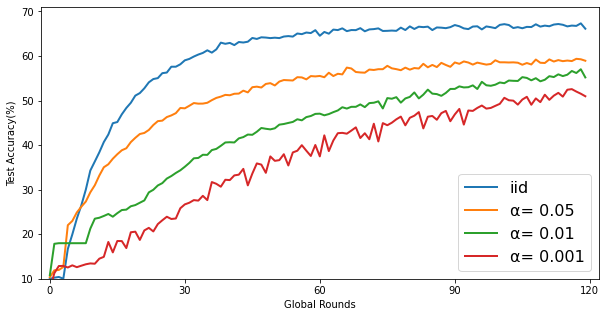

In [494]:
aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

end = 120

fediid = "g_" + "IID_CIFAR10_iid_AlexCIFAR10_lr0.2_da1_db1_iter1200_pre1300" + ".pkl"
# fediid = "g_" + "100Alex_CIFAR100_iid_lr0.2_da0.2_db0.999_iter1200_pre1300" + ".pkl"
iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)[:end]

nbal1 = "g_" + "mixed_Alex_CIFAR10_nbal_0.05_lr0.2_da1_db1_iter1200_pre1300" + ".pkl"
# nbal1 = "g_" + "100Alex_CIFAR100_0.1_lr0.1_da1_db1_iter1500_pre1600" + ".pkl"
nbal1 = np.array(pickle.load(open(file_path + nbal1, 'rb')), dtype=object)[:end]

nbal2 = "g_" + "mixed_Alex_CIFAR10_nbal_0.01_lr0.2_da1_db1_iter2000_pre2100" + ".pkl"
# nbal2 = "g_" + "100Alex_CIFAR100_0.01_lr0.1_da1_db1_iter1500_pre1600" + ".pkl"
nbal2 = np.array(pickle.load(open(file_path + nbal2, 'rb')), dtype=object)[:end]

nbal3 = "g_" + "Alex_CIFAR10_nbal_0.001_lr0.2_da0.2_db0.999_iter2000_pre2100" + ".pkl"
# nbal3 = "g_" + "100Alex_CIFAR100_lr0.1_da0.2_db0.999_iter2500_pre2600" + ".pkl"
nbal3 = np.array(pickle.load(open(file_path + nbal3, 'rb')), dtype=object)[:end]


plt.figure(figsize=(10, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

plt.plot(iid,label="iid", linewidth=2)   #iid
plt.plot(nbal1, label="α= 0.05", linewidth=2)   #nbal_0.05
plt.plot(nbal2, label="α= 0.01", linewidth=2)   #nbal_0.01
plt.plot(nbal3, label="α= 0.001", linewidth=2)   #nbal_0.001

result = []
result.append(iid)
result.append(nbal1)
result.append(nbal2)
result.append(nbal3)

#设置X轴标签
plt.xlabel("Global Rounds")
#设置Y轴标签
plt.ylabel("Test Accuracy(%)")

#设置坐标轴显示间隔
plt.xticks(np.arange(0, 151, step=30))
# plt.yticks(np.arange(0, 81, step=10))

#设置显示区域
plt.xlim(xmin = -2, xmax=122)
plt.ylim(ymin = 10, ymax=71)

font1 = {
    'weight' : 'normal',
    'size'   : 16,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框

# plt.show()

# plt.savefig(f"./pic/CIFAR10_c5f3_nbalTest.png", dpi=300, bbox_inches='tight')

# with open(f"./exp_save/CIFAR10/CIFAR10_c5f3_nbalTest_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)

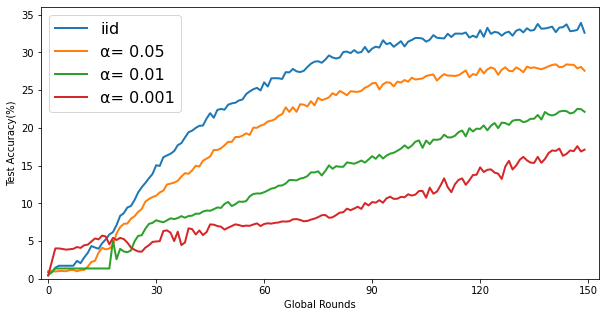

In [497]:
aol = "acc"
# aol = "loss"
file_path = f"./saved_exp_info/server_{aol}/"

end = 150

fediid = "g_" + "IID_CIFAR10_iid_AlexCIFAR10_lr0.2_da1_db1_iter1200_pre1300" + ".pkl"
fediid = "g_" + "100Alex_CIFAR100_0.5_lr0.1_da1_db1_iter1500_pre1600" + ".pkl"
iid = np.array(pickle.load(open(file_path + fediid, 'rb')), dtype=object)[:end]

nbal1 = "g_" + "mixed_Alex_CIFAR10_nbal_0.05_lr0.2_da1_db1_iter1200_pre1300" + ".pkl"
nbal1 = "g_" + "100Alex_CIFAR100_iid_lr0.1_da1_db1_iter1500_pre1600" + ".pkl"
nbal1 = np.array(pickle.load(open(file_path + nbal1, 'rb')), dtype=object)[:end]

nbal2 = "g_" + "mixed_Alex_CIFAR10_nbal_0.01_lr0.2_da1_db1_iter2000_pre2100" + ".pkl"
nbal2 = "g_" + "100Alex_CIFAR100_0.01_lr0.1_da1_db1_iter1500_pre1600" + ".pkl"
nbal2 = np.array(pickle.load(open(file_path + nbal2, 'rb')), dtype=object)[:end]

nbal3 = "g_" + "Alex_CIFAR10_nbal_0.001_lr0.2_da0.2_db0.999_iter2000_pre2100" + ".pkl"
nbal3 = "g_" + "100Alex_CIFAR100_lr0.1_da0.2_db0.999_iter2500_pre2600" + ".pkl"
nbal3 = np.array(pickle.load(open(file_path + nbal3, 'rb')), dtype=object)[:end]


plt.figure(figsize=(10, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

plt.plot(iid,label="iid", linewidth=2)   #iid
plt.plot(nbal1, label="α= 0.05", linewidth=2)   #nbal_0.05
plt.plot(nbal2, label="α= 0.01", linewidth=2)   #nbal_0.01
plt.plot(nbal3, label="α= 0.001", linewidth=2)   #nbal_0.001

result = []
result.append(iid)
result.append(nbal1)

result.append(nbal2)
result.append(nbal3)

#设置X轴标签
plt.xlabel("Global Rounds")
#设置Y轴标签
plt.ylabel("Test Accuracy(%)")

#设置坐标轴显示间隔
plt.xticks(np.arange(0, 151, step=30))
# plt.yticks(np.arange(0, 81, step=10))

#设置显示区域
plt.xlim(xmin = -2, xmax=153)
plt.ylim(ymin = 0, ymax=36)

font1 = {
    'weight' : 'normal',
    'size'   : 16,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

# plt.show()

# plt.savefig(f"./pic/CIFAR100_c5f3_nbalTest.png", dpi=300, bbox_inches='tight')

# with open(f"./exp_save/CIFAR10/CIFAR100_c5f3_nbalTest_{aol}.pkl", "wb") as output:
#     pickle.dump(result, output)